[View in Colaboratory](https://colab.research.google.com/github/tcglarry/alibaba_manufacturing_competition/blob/master/ali_make_test_data_img_preprocess.ipynb)

In [0]:
"""For Alibaba Competition

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/10DYDNSM_eaFtn7lrM0CyUIXRFdIDtabS
"""

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse






Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


In [0]:

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


KeyboardInterrupt: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls drive/Drive

ls: cannot access 'drive/Drive': No such file or directory


In [0]:

!mkdir -p drive
!google-drive-ocamlfuse drive
!ls drive

/bin/bash: google-drive-ocamlfuse: command not found


In [0]:
!cp 'drive/My Drive/kaggle/ali/manu_big_data/guangdong_round1_test_a_20180916.zip' .

In [0]:
#!cp drive/kaggle/ali/manu_big_data/train_sample_total.zip .

cp: cannot stat 'drive/kaggle/ali/manu_big_data/train_sample_total.zip': No such file or directory


In [2]:

!unzip guangdong_round1_test_a_20180916.zip


Archive:  guangdong_round1_test_a_20180916.zip
   creating: guangdong_round1_test_a_20180916/
  inflating: guangdong_round1_test_a_20180916/0.jpg  
 extracting: guangdong_round1_test_a_20180916/1.jpg  
  inflating: guangdong_round1_test_a_20180916/10.jpg  
 extracting: guangdong_round1_test_a_20180916/100.jpg  
  inflating: guangdong_round1_test_a_20180916/101.jpg  
  inflating: guangdong_round1_test_a_20180916/102.jpg  
  inflating: guangdong_round1_test_a_20180916/103.jpg  
  inflating: guangdong_round1_test_a_20180916/104.jpg  
  inflating: guangdong_round1_test_a_20180916/105.jpg  
  inflating: guangdong_round1_test_a_20180916/106.jpg  
  inflating: guangdong_round1_test_a_20180916/107.jpg  
  inflating: guangdong_round1_test_a_20180916/108.jpg  
  inflating: guangdong_round1_test_a_20180916/109.jpg  
  inflating: guangdong_round1_test_a_20180916/11.jpg  
 extracting: guangdong_round1_test_a_20180916/110.jpg  
 extracting: guangdong_round1_test_a_20180916/111.jpg  
 extracting: gua

In [5]:
!ls

adc.json			  guangdong_round1_test_a_20180916.zip
drive				  sample_data
guangdong_round1_test_a_20180916  train_data_img_preprocess_MobileNetV2_2.npy


In [3]:
!pip install --upgrade keras

    100% |████████████████████████████████| 307kB 5.5MB/s 
    100% |████████████████████████████████| 51kB 10.0MB/s 
  Found existing installation: Keras 2.1.6
    Uninstalling Keras-2.1.6:
      Successfully uninstalled Keras-2.1.6


In [4]:

import keras
print (keras.__version__)
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import subprocess
import os
import pickle
import sklearn 

from sklearn.model_selection import train_test_split

from xgboost.sklearn import XGBClassifier




import keras.backend as K

from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
#from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenetv2 import MobileNetV2,preprocess_input
#from keras.applications.nasnet import NASNetMobile,NASNetLarge
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,  img_to_array, load_img



#from keras.applications.xception import Xception, preprocess_input

from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input, Conv2D, MaxPooling2D, merge, Lambda,UpSampling2D, concatenate, Reshape, Dropout,Cropping2D,Activation
from keras.models import Model, load_model
import pandas as pd

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import Callback


from keras import regularizers
#from dummyPy import OneHotEncoder
from keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

import itertools
import time

Using TensorFlow backend.


2.2.2


In [0]:
src_1= 'drive/My Drive/kaggle/ali/'
src_2= 'guangdong_round1_test_a_20180916/'
src_save = 'drive/My Drive/kaggle/ali/'

In [0]:
with open (src_1+'test_file_list.pkl', 'rb') as handle: 
    file_list = pickle.load(handle)

In [9]:
len(file_list)


440

In [0]:
label_list = [] # get first 2 simplex character in file_name
for f in file_list:
    label_list.append(f[:2])
len(label_list)

2386

In [10]:

with open(src_1+'failure_to_label.pkl', 'rb') as handle:
    label_dict = pickle.load(handle)
label_dict  


{'不导': 1,
 '其他': 11,
 '凸粉': 8,
 '擦花': 2,
 '桔皮': 4,
 '横条': 3,
 '正常': 0,
 '涂层': 9,
 '漏底': 5,
 '碰伤': 6,
 '脏点': 10,
 '起坑': 7}

In [0]:
#print (train_x.shape)

In [0]:
def build_model():
    inputs = Input(shape=(480,640,3))
    #inputs = Input(shape=(224,224,3))
   
    # create the base pre-trained model
    #base_model = DenseNet121(weights='imagenet',input_tensor=inputs,  include_top=True)
    base_model = MobileNetV2(weights='imagenet',input_tensor=inputs,  include_top=True)
    #base_model =load_model('drive/My Drive/'+'MobileNetV2.h5')
    x = base_model.output
    model_1_out = base_model.layers[-2].output

 
  
    model_1 = Model(inputs=base_model.input, outputs=model_1_out)
    #model_1.summary()
    
    
    print ('\n\n*******************************=============================')
    model_2_out = base_model.layers[51].output
    
    model_2 = Model(inputs=base_model.input, outputs=model_2_out)
    
    model_2.summary()
    
    return model_2






In [19]:
 model_2 = build_model()



*******************************=============================
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 480, 640, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 240, 320, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 240, 320, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 240, 320, 32) 0           bn_Conv1[0][0]                   
______________________________________________

for i, layer in enumerate(model_1.layers):
    print (f'layer ({i}) layer name is {layer.name}')


checkpoint = ModelCheckpoint(filepath=src_1+'defect_non_defect_dense.h5', monitor = 'val_loss', save_best_only=True, mode= 'auto')
earlystop = EarlyStopping(patience=10)
callback_list = [checkpoint, earlystop]
model_1.fit(x=train_x, y=train_y, batch_size=32, epochs=300, callbacks = callback_list, verbose=1, validation_split=0.2,  shuffle=True)


In [0]:
'''
img_list = []
for i,img in enumerate(file_list):
  

  
    img = load_img(src_2+img)  # an PIL instance
    img = img.resize((2560//4,1920//4))
    x = img_to_array(img) # convert PIL to numpy array
    x = preprocess_input(x)
    x = x[np.newaxis,:,:,:]
    img_list.append(x)
    
    if i % 200 ==0:
      print (f'{i} images read ')
      print ('img_list len', len(img_list))
      train_img_array =  np.concatenate(img_list)

      np.save(src_1+'train_img_array_' + str(i)+'.npy',train_img_array)
      print ('i saved', 'shape = ', train_img_array.shape)  
    if i %2000 == 0:
      train_img_array =  np.concatenate(img_list)
      np.save(src_1+'train_img_array_2000.npy',train_img_array)
      print ('train_img_array_2000 saved')
    
    

    
train_img_array =  np.concatenate(img_list)
print (train_img_array.shape)


np.save(src_1+'train_img_array.npy',train_img_array)
    
print ('image read comleted, converted to nhumpy and saved')

'''

"\nimg_list = []\nfor i,img in enumerate(file_list):\n  \n\n  \n    img = load_img(src_2+img)  # an PIL instance\n    img = img.resize((2560//4,1920//4))\n    x = img_to_array(img) # convert PIL to numpy array\n    x = preprocess_input(x)\n    x = x[np.newaxis,:,:,:]\n    img_list.append(x)\n    \n    if i % 200 ==0:\n      print (f'{i} images read ')\n      print ('img_list len', len(img_list))\n      train_img_array =  np.concatenate(img_list)\n\n      np.save(src_1+'train_img_array_' + str(i)+'.npy',train_img_array)\n      print ('i saved', 'shape = ', train_img_array.shape)  \n    if i %2000 == 0:\n      train_img_array =  np.concatenate(img_list)\n      np.save(src_1+'train_img_array_2000.npy',train_img_array)\n      print ('train_img_array_2000 saved')\n    \n    \n\n    \ntrain_img_array =  np.concatenate(img_list)\nprint (train_img_array.shape)\n\n\nnp.save(src_1+'train_img_array.npy',train_img_array)\n    \nprint ('image read comleted, converted to nhumpy and saved')\n\n"

In [0]:
def first_prediction(model,data):
    pred_temp = model.predict(data)
    return pred_temp

In [0]:
# assign batch inferefcing of pre-traianed model to be 4 

def make_batch (file_ist,batch_size):
  final_list =[]
  
 
  floor = int(np.floor(len(file_list)/batch_size))
  print ('floor=', floor)
  for i in range(floor+1):
      if i < floor:
          final_list.append(file_list[i*batch_size:(i+1)*batch_size])
      else: 
          final_list.append(file_list[i*batch_size:])
          
  # check final_llist len equal to file_list  
  a =0 
  for l in final_list:
    #print (len(l))
    #print (l[-10:])
    a += len(l)
  if (a - len(final_list) == 0):  
    print ('total size', a, 'final_list length equal to file_list')
  else:
    print ('total size', a, 'file_list', len(file_list),'final_list length NOT equal to file_list')
    print (a - len(file_list))
    print ('warning, something wrong')
    
  return final_list  



In [22]:
batch_size = 17
final_list = make_batch(file_list,batch_size)
print (len(final_list))

floor= 25
total size 440 file_list 440 final_list length NOT equal to file_list
0
warning, something wrong
26


In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
s= time.time()
final_array = []
for j,l in enumerate(final_list):
      img_list=[]
      for i,img in enumerate(l):
        
        
        
        img = load_img(src_2+img)
        
        if i == 0:
            print (img.size)
        '''    
        img = img.resize((2560//4,1920//4))
        if i == 0:
            print (img.size)
            
        '''
        
        x = img_to_array(img)
        
        my_filter = (x.max(axis=2) - x.min(axis=2)) < 50  # get mask 
        
        for k in range(3):           
            x[:,:,k] *= my_filter  # mask out the unnecessary part
        
        x = preprocess_input(x)
        

        if i  == 0 :          
            print (x.shape)
          #x = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
          #x = x/127.5 -1.
          img_list.append(x)
      #print ('img_list=', len(img_list))
      testing_data = np.array(img_list)

      #print ('testing_data_shape', testing_data.shape)
      #train_data =  train_data[:,:,:,np.newaxis]
      #print (testing_data.shape)
      pred_temp = first_prediction(model_1,testing_data)

      print('batch = ', j, 'stage 1 completed', 'shape=', pred_temp.shape)
      #np.save(src_save+'temp_'+str(j)+'.npy',pred_temp)

      #print ('bacth npy saved', j)
      e = time.time()
      print ('batch',j,'time=', round(e -s ,4))

      final_array.append(pred_temp)
      print ('afterbatch',j,'length=', len(final_array))

final_array = np.concatenate(final_array)
print ('final array', final_array.shape)
np.save(src_1+'test_data_img_preprocess_MobileNetV2_2.npy',final_array)
print ('totally done, test_data_img_preprocess_MobileNetV2_2.npy.npy')


(480, 640, 3)
batch =  0 stage 1 completed shape= (17, 60, 80, 32)
batch 0 time= 3.9227
afterbatch 0 length= 1
(480, 640, 3)
batch =  1 stage 1 completed shape= (17, 60, 80, 32)
batch 1 time= 5.6949
afterbatch 1 length= 2
(480, 640, 3)
batch =  2 stage 1 completed shape= (17, 60, 80, 32)
batch 2 time= 7.4793
afterbatch 2 length= 3
(480, 640, 3)
batch =  3 stage 1 completed shape= (17, 60, 80, 32)
batch 3 time= 9.2845
afterbatch 3 length= 4
(480, 640, 3)
batch =  4 stage 1 completed shape= (17, 60, 80, 32)
batch 4 time= 11.0808
afterbatch 4 length= 5
(480, 640, 3)
batch =  5 stage 1 completed shape= (17, 60, 80, 32)
batch 5 time= 12.8592
afterbatch 5 length= 6
(480, 640, 3)
batch =  6 stage 1 completed shape= (17, 60, 80, 32)
batch 6 time= 14.6648
afterbatch 6 length= 7
(480, 640, 3)
batch =  7 stage 1 completed shape= (17, 60, 80, 32)
batch 7 time= 16.4895
afterbatch 7 length= 8
(480, 640, 3)
batch =  8 stage 1 completed shape= (17, 60, 80, 32)
batch 8 time= 18.253
afterbatch 8 length=

In [0]:
---


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
cnf_matrix = confusion_matrix(val_y, predictions)

Confusion matrix, without normalization
[[181  89]
 [146  62]]


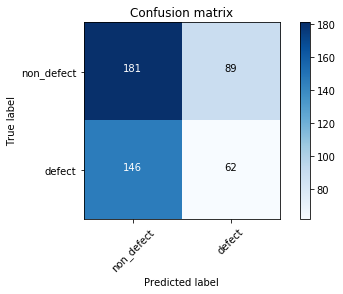

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

In [0]:
import pickle
with open (src_save+'xgb_densenet12_correct.pkl','wb') as handle:
  pickle.dump(xgb1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
print (val_x.shape, val_y.shape)

(478, 1000) (478,)


In [0]:
print (predictions)

[0, 0, 0, 0, 5, 5, 0, 4, 0, 8, 0, 5, 0, 0, 4, 11, 0, 2, 0, 5, 0, 0, 0, 0, 5, 5, 0, 5, 2, 5, 0, 7, 0, 4, 11, 5, 0, 0, 0, 0, 5, 0, 0, 9, 11, 0, 0, 0, 6, 5, 0, 5, 5, 1, 10, 5, 2, 0, 8, 0, 5, 5, 5, 0, 5, 0, 6, 10, 0, 5, 0, 0, 2, 0, 0, 10, 0, 2, 5, 4, 1, 0, 0, 0, 2, 3, 0, 0, 8, 5, 10, 5, 0, 10, 10, 11, 5, 2, 5, 0, 0, 0, 10, 1, 0, 3, 8, 2, 8, 4, 5, 5, 0, 0, 2, 0, 0, 11, 10, 0, 0, 10, 5, 0, 0, 0, 0, 11, 4, 0, 1, 0, 10, 2, 5, 0, 0, 0, 0, 2, 11, 0, 0, 0, 2, 0, 0, 10, 0, 11, 0, 2, 0, 5, 0, 0, 0, 0, 0, 5, 6, 11, 0, 3, 7, 10, 0, 5, 5, 0, 5, 8, 0, 5, 0, 0, 5, 5, 0, 11, 6, 0, 8, 10, 0, 10, 0, 5, 0, 0, 5, 5, 0, 0, 6, 0, 1, 0, 5, 0, 8, 0, 5, 0, 8, 5, 5, 8, 0, 10, 0, 0, 5, 0, 11, 0, 0, 4, 5, 0, 0, 0, 0, 2, 5, 5, 3, 0, 7, 0, 6, 7, 0, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 7, 2, 0, 5, 0, 0, 5, 10, 0, 0, 0, 0, 5, 1, 5, 10, 10, 5, 0, 10, 8, 11, 0, 6, 0, 0, 10, 5, 0, 0, 5, 2, 0, 5, 8, 0, 0, 5, 11, 0, 0, 2, 0, 4, 5, 2, 5, 0, 0, 5, 8, 0, 10, 5, 0, 0, 4, 3, 11, 8, 0, 0, 0, 10, 5, 0, 0, 0, 0, 0, 1, 

In [0]:
print (val_y)

[ 0  0  5  0  5  5  0  4  0  8  0  5  0  0  4 11  0  2  0  5  0  0  0  0
  5  5  0  5 10  5  0  7  0  4 11  5  0  0  0  0  5  0  2  9 11  0  0  0
  6  5  0  5  5  1  6  5  2  0  8  0  5  5  5  0  5  0  6 10  0  5  0  0
  2  0  0 10  2  2  5  4  6  0  0  0  2  3  0  0  8  5 10  5  0 10 11 11
  5  2  5  0  0  0  0  1  0  3  8  2  8  4  5  5  0  0  2  0  0 11 10  0
  0  6  5  0  0  0  0 11  4  0 11  0 10  2  5  2  0  0  0  2 11  0  0  0
  2  0  0 10  0 10  0  2 11  5  0  0  0  0  0  5  6  6  0  3  7 10  0  5
  5  0  5  8  0  5  0  0  5  5  0 11  6  0  8 10  0 10  0  5  0  0  5  5
  0  0  6  0  1  0  5  0  8  0  5  0  8  5  5  8  0 10  0  0  5  0 11  0
  0  4  5  0  0  0  0  2  5  5  3  0  7  0  6  7  0  0  0  5  0  4  0  5
 11  0  0  0  0  0  3  5  0  0  7  2  0  5  0  0  5 10  0  0  0  0  1  1
  5 10 10  5  0 10  8 11  0  8  0  7  6  5  0  0  5  2  0  5  8  0  7  5
 11  0  0  2  9  4  5  2  5 10  0  5  8  0 10  4  0  0  4  3 11  8  0  0
  0 10  5  0  0  0  0  0  1  5  0  0  0  0  6  0  7